In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib as pt

# Retreiving Files from Google Drive

In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link2015 = 'https://drive.google.com/file/d/1tZrq6knxxNexKWfJxvbfEbkMwzyz_Qku/view?usp=sharing'

downloaded = drive.CreateFile({'id':'1tZrq6knxxNexKWfJxvbfEbkMwzyz_Qku'}) 
downloaded.GetContentFile('2015LEAP-subgroups.csv')  
leap15 = pd.read_csv('2015LEAP-subgroups.csv')

# Information about the Data


*   Source: [Louisiana Department of Education Data Center](https://www.louisianabelieves.com/resources/library/data-center)
*   The LEAP exams are conducted in the late spring for grades 3-8; high school standardized testing are in the form of End of Course exams
*   Scores are divided into 5 catergories: Advanced, Mastery, Basic, Approaching Basic, and Unsatisfactory
*   The % reported in the dataframe below are the % of total students tested that reach the score category
*   The focus on demographic subgroups is a recent development from the state. If data was subdivided by demographic subgroups, that data is not available on the state website.
*   Since 2015, the types of subgroups has expanded significantly, but for comparison of the same data across all 5 years, I am using only the subgroups available to all 5 years.



## First look at the dataframe

In [4]:
leap15.head()

,SchoolSystemName,Grade,Subgroup,ELAAdvanced,ELAMastery,ELABasic,ELAApproachingBasic,ELAUnsatisfactory,MathAdvanced,MathMastery,MathBasic,MathApproachingBasic,MathUnsatisfactory
0,Louisiana Statewide,3,American Indian or Alaska Native,≤5,35,30,22,13,≤5,29,36,18,11
1,Louisiana Statewide,3,Asian,7,51,22,11,9,25,42,21,9,≤5
2,Louisiana Statewide,3,Black or African American,≤5,24,27,27,22,≤5,22,31,29,16
3,Louisiana Statewide,3,Economically Disadvantaged,≤5,28,28,24,19,≤5,26,32,26,14
4,Louisiana Statewide,3,English Learner,≤5,19,23,23,34,≤5,25,30,24,16


In [5]:
leap15.describe()

,Grade
count,52328.000000
mean,5.252446
std,1.680111
min,3.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,8.000000


I originally thought this issue (that the is only one complete numerical columns) was because there were mixed data types (strings and numbers), but after moving on, I realized all the score values are objects rather than numeric data types.


# Dealing with "Missing" Values
This dataset, like most real world data is full of gaps. Every single column contains at least one '<=5' string, making calculations impossible to perform.

Options for dealing with this issue:


*   Drop all rows with '<=5' strings (this would delete too much data)
*   Replace all '<=5' strings with 0 (this will skew the data low)
*   Replace all '<=5' strings with 5 (this will skew the data high)
*   Replace all '<=5' strings with NaN or None types and have Pandas ignore those types in calculations (this is similar to how Excel treats empty/NA cells; this will skew data high)
*   Replace all '<=5' strings with 2.5 (this should not skew the data in one direction over another)
*   Same options exists for the >=95 values (but the data would be skewed int he opposite directsion described above)


In [6]:
leap15 = leap15.replace(to_replace = '≤5', value = 2.5)
leap15 = leap15.replace(to_replace = '≥95', value = 97.5)

In [7]:
# deleting rows or parish data that did not divide by subgroups (contained NR for all scores instead)
leap15.drop(leap15[leap15['ELAAdvanced'] == 'NR'].index, inplace = True)
leap15.drop(leap15[leap15['MathAdvanced'] == 'NR'].index, inplace = True)
leap15.head()

,SchoolSystemName,Grade,Subgroup,ELAAdvanced,ELAMastery,ELABasic,ELAApproachingBasic,ELAUnsatisfactory,MathAdvanced,MathMastery,MathBasic,MathApproachingBasic,MathUnsatisfactory
0,Louisiana Statewide,3,American Indian or Alaska Native,2.5,35,30,22,13,2.5,29,36,18,11
1,Louisiana Statewide,3,Asian,7,51,22,11,9,25,42,21,9,2.5
2,Louisiana Statewide,3,Black or African American,2.5,24,27,27,22,2.5,22,31,29,16
3,Louisiana Statewide,3,Economically Disadvantaged,2.5,28,28,24,19,2.5,26,32,26,14
4,Louisiana Statewide,3,English Learner,2.5,19,23,23,34,2.5,25,30,24,16


## Converting score values to numeric data types

In [8]:
leap15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17773 entries, 0 to 52327
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SchoolSystemName       17773 non-null  object
 1   Grade                  17773 non-null  int64 
 2   Subgroup               17773 non-null  object
 3   ELAAdvanced            17773 non-null  object
 4   ELAMastery             17773 non-null  object
 5   ELABasic               17773 non-null  object
 6   ELAApproachingBasic    17773 non-null  object
 7   ELAUnsatisfactory      17773 non-null  object
 8   MathAdvanced           17773 non-null  object
 9    MathMastery           17773 non-null  object
 10  MathBasic              17773 non-null  object
 11   MathApproachingBasic  17773 non-null  object
 12  MathUnsatisfactory     17773 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.9+ MB


In [9]:
# there are leading spaces in two of the column headings; this renames those

leap15 = leap15.rename(columns = {' MathMastery': 'MathMastery', ' MathApproachingBasic': 'MathApproachingBasic'}, inplace = False)

In [10]:
# convert all score data to numerica values
# groing through one at a time, because I was getting too many errors to do it all at the same time

# ELA Scores
leap15["ELAAdvanced"] = pd.to_numeric(leap15["ELAAdvanced"])
leap15["ELAMastery"] = pd.to_numeric(leap15["ELAMastery"])
leap15["ELABasic"] = pd.to_numeric(leap15["ELABasic"])
leap15["ELAApproachingBasic"] = pd.to_numeric(leap15["ELAApproachingBasic"])
leap15["ELAUnsatisfactory"] = pd.to_numeric(leap15["ELAUnsatisfactory"])

# Math Scores
leap15["MathAdvanced"] = pd.to_numeric(leap15["MathAdvanced"])
leap15["MathMastery"] = pd.to_numeric(leap15["MathMastery"])
leap15["MathBasic"] = pd.to_numeric(leap15["MathBasic"])
leap15["MathApproachingBasic"] = pd.to_numeric(leap15["MathApproachingBasic"])
leap15["MathUnsatisfactory"] = pd.to_numeric(leap15["MathUnsatisfactory"])

leap15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17773 entries, 0 to 52327
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SchoolSystemName      17773 non-null  object 
 1   Grade                 17773 non-null  int64  
 2   Subgroup              17773 non-null  object 
 3   ELAAdvanced           17773 non-null  float64
 4   ELAMastery            17773 non-null  float64
 5   ELABasic              17773 non-null  float64
 6   ELAApproachingBasic   17773 non-null  float64
 7   ELAUnsatisfactory     17773 non-null  float64
 8   MathAdvanced          17773 non-null  float64
 9   MathMastery           17773 non-null  float64
 10  MathBasic             17773 non-null  float64
 11  MathApproachingBasic  17773 non-null  float64
 12  MathUnsatisfactory    17773 non-null  float64
dtypes: float64(10), int64(1), object(2)
memory usage: 1.9+ MB


# Splitting the Data for Anlysis and Graphing

No error values are reported for any of the state data so I need to generate some standard deviation values (at a minimum) to do furhter analysis. I'm going to use the statewide data for graphing and analysis of the gap data, so I'll use the "Total Population" parish score data to generate standard deviation values for each grade/score.

In [11]:
# Separate out Statewide data for analysis of gaps later
leap15st = leap15[leap15["SchoolSystemName"] == 'Louisiana Statewide']

# want to get parish data only to generate standard deviations to use for statewide data
leap15p = leap15[leap15["SchoolSystemName"] != 'Louisiana Statewide']

# isolate the total populations from each parish
leap15p = leap15p[leap15p['Subgroup']=="Total Population"]
leap15p.head()

,SchoolSystemName,Grade,Subgroup,ELAAdvanced,ELAMastery,ELABasic,ELAApproachingBasic,ELAUnsatisfactory,MathAdvanced,MathMastery,MathBasic,MathApproachingBasic,MathUnsatisfactory
74,Acadia Parish,3,Total Population,2.5,37.0,27.0,18.0,15.0,6.0,37.0,33.0,17.0,8.0
85,Acadia Parish,4,Total Population,2.5,36.0,36.0,20.0,2.5,2.5,41.0,33.0,19.0,6.0
96,Acadia Parish,5,Total Population,2.5,33.0,39.0,22.0,2.5,2.5,31.0,38.0,24.0,2.5
107,Acadia Parish,6,Total Population,2.5,40.0,34.0,17.0,7.0,2.5,25.0,31.0,31.0,11.0
118,Acadia Parish,7,Total Population,2.5,33.0,28.0,22.0,13.0,2.5,21.0,35.0,29.0,12.0


In [12]:
# need to group by grade then calculate the standard deviation
SDleap15p = leap15p.groupby('Grade').std()

In [13]:
SDleap15p.head()

,ELAAdvanced,ELAMastery,ELABasic,ELAApproachingBasic,ELAUnsatisfactory,MathAdvanced,MathMastery,MathBasic,MathApproachingBasic,MathUnsatisfactory
Grade,,,,,,,,,,
3,3.008429,16.242949,7.904314,9.335843,11.820600,6.375777,14.735579,8.810238,11.089418,10.216365
4,4.168970,15.931503,9.647656,11.008385,7.432108,3.316135,16.929099,9.396638,13.339846,10.034547
5,1.363350,15.819229,8.847207,11.901508,7.907821,4.385093,14.083137,9.855825,13.925581,8.547032
6,2.877673,15.307035,9.290210,10.423483,7.558268,3.582455,14.348834,10.693481,13.745210,9.440353
7,5.852745,14.039703,9.353775,10.662175,11.803346,3.268219,13.284487,11.054576,12.540709,12.106999


In [35]:
SDleap15p["ELAMastery"].mean()   # average Standard deviation for ELA Mastery Scores

15.63317072374688

In [36]:
SDleap15p["MathMastery"].mean()   # average Standard deviation for Math Mastery Scores

14.778510502069645

### A note about Error

The state provides no information about the spread of the data nor the total number of students in each parish or subcategory, thus making standard error impossible to calculate. While it is interesting to compare the spread of the data for different tests score categories (or for subgroups), the stnadard error would be necessary for plotting and comparison purposes. As a result, I will not be including error bars on the graphs of gap data over time.

# Preliminary Visializations

In [14]:
leap15st.Subgroup.unique()

array(['American Indian or Alaska Native', 'Asian',
       'Black or African American', 'Economically Disadvantaged',
       'English Learner', 'Hispanic/Latino',
       'Native Hawaiian or Other Pacific Islander',
       'Students with Disability', 'Total Population',
       'Two or more races', 'White'], dtype=object)

In [15]:
# the names are too long for charts
leap15st = leap15st.replace(to_replace = ['American Indian or Alaska Native', 'Asian', 'Black or African American', 'Economically Disadvantaged', 'English Learner', 'Hispanic/Latino', 'Native Hawaiian or Other Pacific Islander', 'Students with Disability', 'Total Population', 'Two or more races', 'White'], 
                            value = ['AI/AN','AS', 'BK', 'ED', 'ELL', 'HL', 'NH/PI', 'Dis', 'TotPop', 'MR', 'WH'])

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


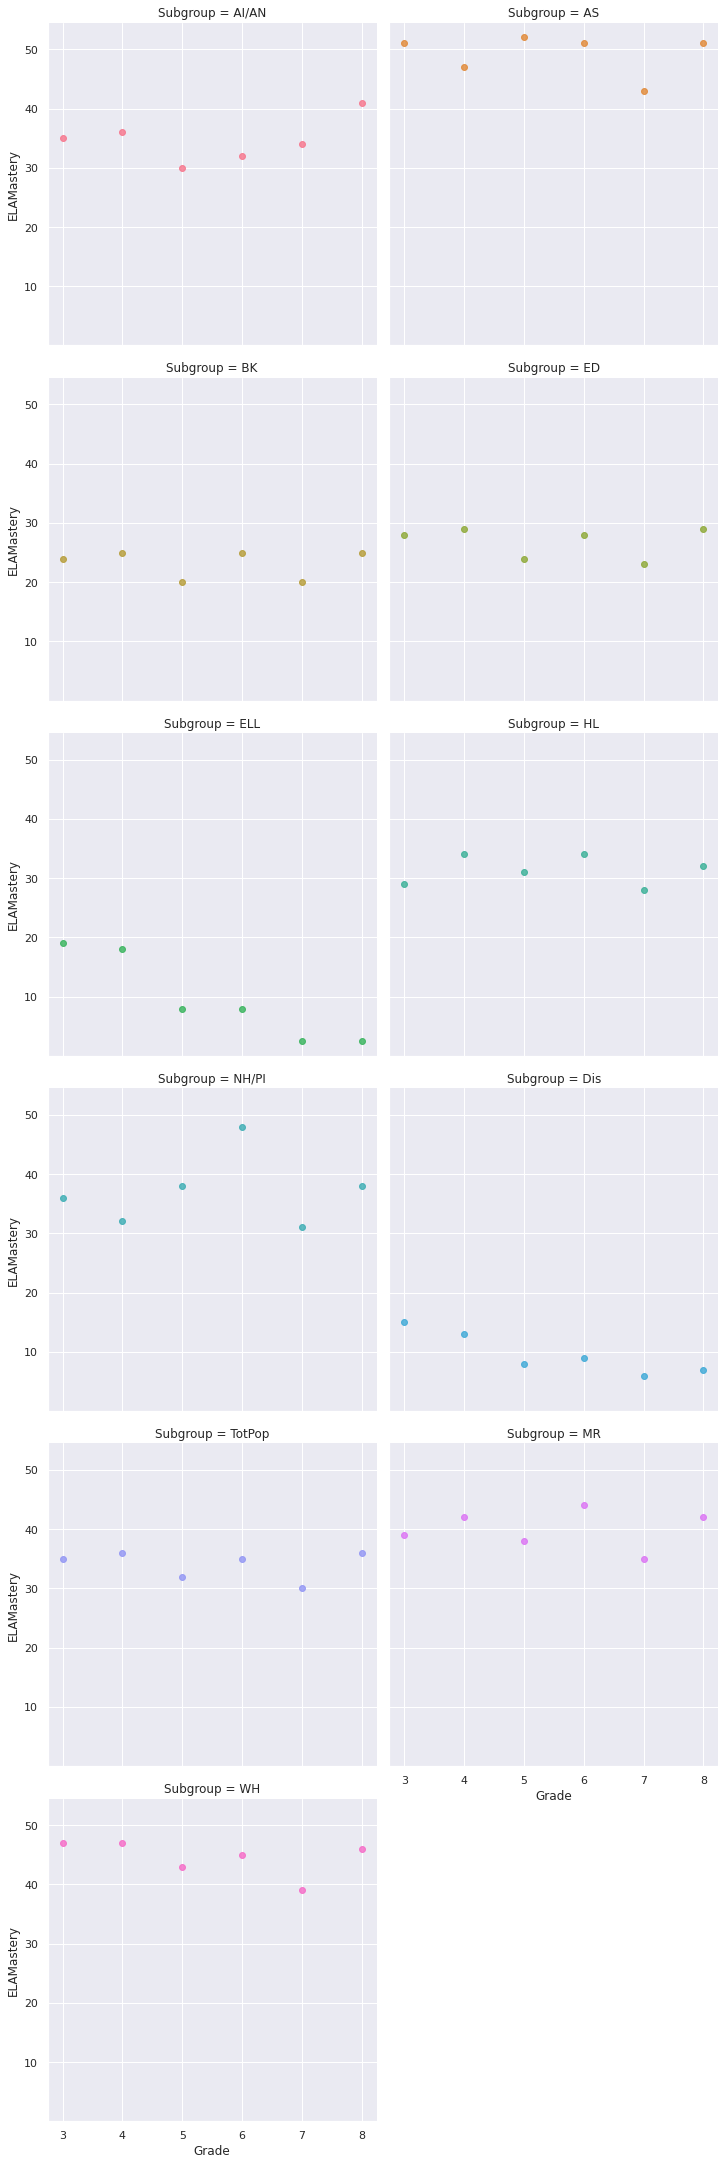

In [17]:
sns.lmplot("Grade", "ELAMastery", data=leap15st, hue="Subgroup", fit_reg=False, col='Subgroup', col_wrap=2);

These graphs are not super useful if you can't compare the data easily. Need to plot them all together.

In [18]:
# get rid of extra Columns to make visualization easier
leap15vis = leap15st.drop(columns = ['SchoolSystemName', 'ELABasic',	'ELAApproachingBasic',	'ELAUnsatisfactory',
                                     'MathBasic',	'MathApproachingBasic',	'MathUnsatisfactory'])
#leap15vis.head(20)

# separate out racial data from other categories
# race categories
leap15Race = leap15vis[(leap15vis.Subgroup == 'TotPop') | (leap15vis.Subgroup == 'AI/AN') | (leap15vis.Subgroup == 'AS') | (leap15vis.Subgroup == 'BK') | (leap15vis.Subgroup == 'HL') | (leap15vis.Subgroup == 'MR') | (leap15vis.Subgroup == 'NH/PI') | (leap15vis.Subgroup == 'WH')]

# other categories
leap15Cat = leap15vis[(leap15vis.Subgroup == 'TotPop') | (leap15vis.Subgroup == 'ED') | (leap15vis.Subgroup == 'Dis') | (leap15vis.Subgroup == 'ELL')]

# ELA % Mastery Socre Distributions by Subgroups

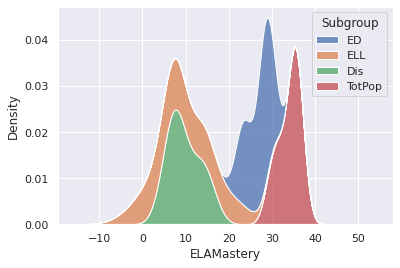

In [19]:
'''
Subgroup abbreviations key:
Dis = Students with a disability
ED = Economically Disadvantaged
ELL = English Language Learners
TotPop = Total Population
'''

sns.kdeplot(data=leap15Cat, x="ELAMastery", hue="Subgroup", multiple="stack");

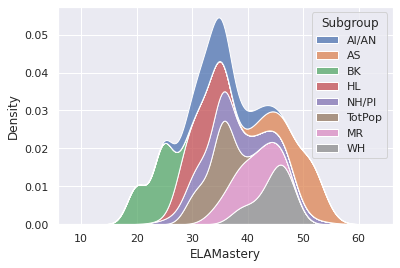

In [20]:
'''
Subgroup abbreviations key:
AI/AN = American Indian or Alaskan Native
AS = Asian
BK = Black or Affican American
HL = Hispanic or Latino
NH/PI = Native Hawaiian or Pacific Islander
TotPop = Total Population
MR = Multi-race
WH = White
'''
sns.kdeplot(data=leap15Race, x="ELAMastery", hue="Subgroup", multiple="stack");

## Distribution Plot Discussion & Conclusions
### ELA Mastery by Subgroup Categories

Compared to the distrubution of the Total Population, the greatest disparities are evident in the English Language Learners and the Students with disabilities, which both have peaks centered below 10% and shoulders below 15%. The ELL appears bimodal with a second peak rising below 30%, which might indicate different language groups have different success with the ELA LEAP exam. Unfortunately, the state does not provide information about further breakdown of that category. Total Population distribution is centered around 35% with a shoulder around 30%.

Some options for further investigation: (1) Determine the groups that make up the bulk of the two ELL peaks and target policies to furhter support the students in the lower peak specifically; (2) Examine the change in the ELL-TotPop gap over time and compare to the change in population of the students over the same time frame to identify the student supports that most affect the impovement of scores; (3) Identify the policies supporting ELA for students with disabilities and revamp or create new supports as needed (perhaps with help of a similar time series from point 2).

### ELA Mastery by Racial Subgroups

Many races show a multi-modal distribution of scores (e.g. NH/PI, AI/AN, etc...) indicating that ELA mastery is impacted by more than just racial variables. The primary peak for BK students (centered at ~25% aith a shoulder at 20%) shows the greatest separation from the total population (centered at ~35%). The multi-modal nature of the racial subgroups also means that analyzing the gaps between performance by racial subgroups will be challenging to compare and inteterpret. A look at the gaps from some of these subgroups compared to the total poulation will need to include standard error of the mean to account for the differences in population sizes (as indicated by the peak height differences in these stacked charts).

Some options for further investigation: (1) Time series comparison for all of these differences is important to look at to point towards causal relaptionships to implemented educational policies that affect standardized test performance; (2) Potential for Principle Component Analysis to determine the number of variables that significantly affect the score data for each subgroup.

# Math % Mastery Socre Distributions by Subgroups

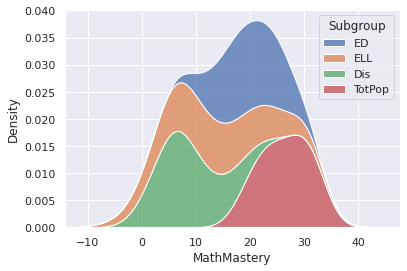

In [21]:
'''
Subgroup abbreviations key:
Dis = Students with a disability
ED = Economically Disadvantaged
ELL = English Language Learners
TotPop = Total Population
'''

sns.kdeplot(data=leap15Cat, x="MathMastery", hue="Subgroup", multiple="stack");

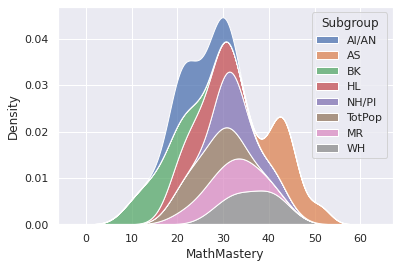

In [22]:
'''
Subgroup abbreviations key:
AI/AN = American Indian or Alaskan Native
AS = Asian
BK = Black or Affican American
HL = Hispanic or Latino
NH/PI = Native Hawaiian or Pacific Islander
TotPop = Total Population
MR = Multi-race
WH = White
'''
sns.kdeplot(data=leap15Race, x="MathMastery", hue="Subgroup", multiple="stack");

## Distribution Plot Discussion & Conclusions
### Math Mastery by Racial Subgroups

*   AS appears bimodal
*   AI/AN & HL centered at ~30%; AI/AN shows a shoulder ~23%
*   NH/PI, HL, and AI/AN all centered below TotPop
*   AS, MR, and WH all centered above TotPop

### Math Mastery by Other Demographic Categories

*   ELL and Dis are both bimodal with peaks at ~7% broader peaks at ~25%
*   ED is a broader peak at ~22% with a shoulder below 10%
*   TotPop is a broad peak centered ~27%

## Visualizing All Mastery Scores: Box and Whisker Plots

Noramlly, these types of plots would be used to visualize outliers, but since this is not experimental data, there is no basis for eliminating data points. Some later years do include some "outliers". I'm leaving these plots in, but I will not be excluding mathematical "outliers."

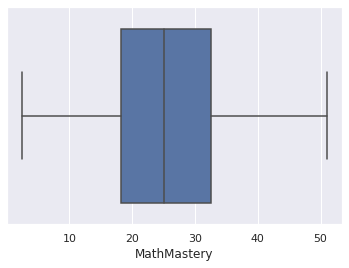

In [23]:
# Check for outliers in Math Mastery data
sns.boxplot(x=leap15st['MathMastery']);

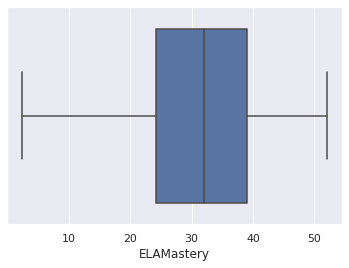

In [24]:
# Check for outliers in ELA Mastery data
sns.boxplot(x=leap15st['ELAMastery']);

# Calculating the Subgroup Gaps

In [25]:
# dropping the Advanced categories
leap15vis = leap15vis.drop(columns = ['ELAAdvanced', 'MathAdvanced'])

In [26]:
leap15vis.head(10)

,Grade,Subgroup,ELAMastery,MathMastery
0,3,AI/AN,35.0,29.0
1,3,AS,51.0,42.0
2,3,BK,24.0,22.0
3,3,ED,28.0,26.0
4,3,ELL,19.0,25.0
5,3,HL,29.0,30.0
6,3,NH/PI,36.0,33.0
7,3,Dis,15.0,17.0
8,3,TotPop,35.0,31.0
9,3,MR,39.0,33.0


In [27]:
# find the locations of the Total Populations for each grade
print(leap15vis[leap15vis['Subgroup']=='TotPop'].index.values)

[ 8 19 30 41 52 63]


In [28]:
conditions = [(leap15vis['Grade'] == 3),
              (leap15vis['Grade'] == 4),
              (leap15vis['Grade'] == 5),
              (leap15vis['Grade'] == 6),
              (leap15vis['Grade'] == 7),
              (leap15vis['Grade'] == 8)]
values = [(leap15vis['ELAMastery'] - leap15vis['ELAMastery'].loc[8]),
          (leap15vis['ELAMastery'] - leap15vis['ELAMastery'].loc[19]),
          (leap15vis['ELAMastery'] - leap15vis['ELAMastery'].loc[30]),
          (leap15vis['ELAMastery'] - leap15vis['ELAMastery'].loc[41]),
          (leap15vis['ELAMastery'] - leap15vis['ELAMastery'].loc[52]),
          (leap15vis['ELAMastery'] - leap15vis['ELAMastery'].loc[63])]
leap15vis['ELA-Gap'] = np.select(conditions, values)
leap15vis.head()

,Grade,Subgroup,ELAMastery,MathMastery,ELA-Gap
0,3,AI/AN,35.0,29.0,0.0
1,3,AS,51.0,42.0,16.0
2,3,BK,24.0,22.0,-11.0
3,3,ED,28.0,26.0,-7.0
4,3,ELL,19.0,25.0,-16.0


In [29]:
conditions = [(leap15vis['Grade'] == 3),
              (leap15vis['Grade'] == 4),
              (leap15vis['Grade'] == 5),
              (leap15vis['Grade'] == 6),
              (leap15vis['Grade'] == 7),
              (leap15vis['Grade'] == 8)]
values = [(leap15vis['MathMastery'] - leap15vis['MathMastery'].loc[8]),
          (leap15vis['MathMastery'] - leap15vis['MathMastery'].loc[19]),
          (leap15vis['MathMastery'] - leap15vis['MathMastery'].loc[30]),
          (leap15vis['MathMastery'] - leap15vis['MathMastery'].loc[41]),
          (leap15vis['MathMastery'] - leap15vis['MathMastery'].loc[52]),
          (leap15vis['MathMastery'] - leap15vis['MathMastery'].loc[63])]
leap15vis['Math-Gap'] = np.select(conditions, values)
leap15vis.head()

,Grade,Subgroup,ELAMastery,MathMastery,ELA-Gap,Math-Gap
0,3,AI/AN,35.0,29.0,0.0,-2.0
1,3,AS,51.0,42.0,16.0,11.0
2,3,BK,24.0,22.0,-11.0,-9.0
3,3,ED,28.0,26.0,-7.0,-5.0
4,3,ELL,19.0,25.0,-16.0,-6.0


In [30]:
#function to return the y values for a given grade and test
def yVal(year, test, g):
  
  #determines which year's dataframe to use
  if year == 2015:
    df = leap15vis
  elif year == 2016:
    df = leap16vis
  elif year == 2017:
    df = leap17vis
  elif year == 2018:
    df = leap18vis
  elif year == 2019:
    df = leap19vis
  else:
    print("You must enter a valid year: 2016, 2017, 2018, or 2019")

  # creates a smaller Dataframe containing only grade g data
  gdf = df[(df['Grade'] == g)]
  if (test == 'ELA'):
    yval = gdf['ELA-Gap'] #returns ELA-Gap values for grade g
  elif (test == 'Math'):
    yval = gdf['Math-Gap'] #returns Math-Gap values for grade g
  else:
    print("You must enter 'ELA' or 'Math'") # returns an error message of the correct test name isn't given
  return yval

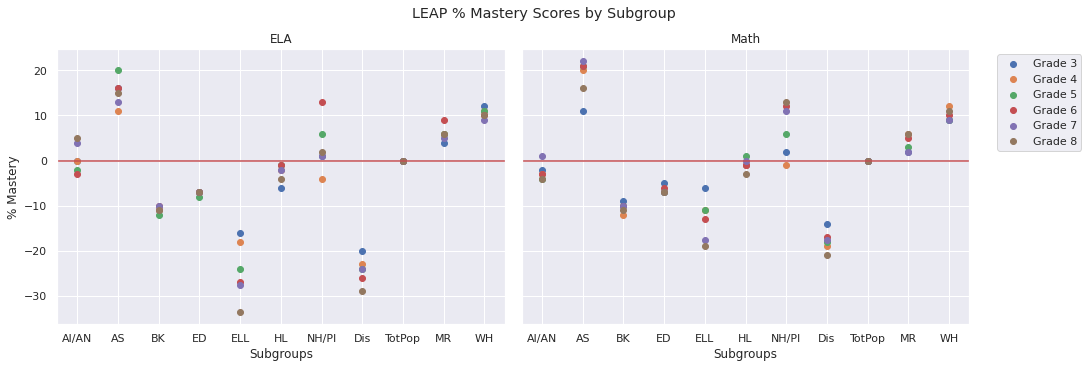

In [31]:
# Plotting the Gaps

# generating xvalues
# use the same x for all y (the choice of grade 3 subgroup labels is arbitrary)
g3 = leap15vis[(leap15vis['Grade'] == 3)]
x = g3['Subgroup']

#setting up the figure and axes
fig, (ax1, ax2) = plt.subplots(1,2, sharex = True, sharey = True, figsize=(15,5), constrained_layout = True)
fig.suptitle('LEAP % Mastery Scores by Subgroup');

# ELA Plot Values & Parameters
for g in range(3,9):
  ax1.scatter(x, yVal(2015, 'ELA', g), label = ('Grade ' + str(g)));
ax1.set(xlabel='Subgroups', ylabel='% Mastery');
ax1.label_outer();
ax1.set_title('ELA');
ax1.axhline(y = 0, color = 'r', linestyle = '-');

#Math Plot Values & Parameters
for g in range(3,9):
  ax2.scatter(x, yVal(2015, 'Math', g), label = ('Grade ' + str(g)));
ax2.label_outer();
ax2.set(xlabel='Subgroups');
ax2.set_title('Math');
ax2.axhline(y = 0, color = 'r', linestyle = '-');
plt.legend(bbox_to_anchor=(1.05, 1));

### Observations for both ELA-Gap and Math-Gap by Subgroups

*   Groups with positive deviations (scores above the TotPop): AS, WH, MR
*   Groups with negative deviations (scores below the TotPop): BK, ED, ELL, Dis
*   Groups that span the zero line (some grades above and some grades below TotPop): AI/AN, NH/PI
*   Highly clustered groups (e.g. BK, ED, WH) have very consistent perfromance within the subgroup compared to TotPop
*   Subgroups with high spread (e.g. ELL, Dis, NH/PI) perform differently across grades when compared to TotPop
*   Greatest gap (deviation from TotPop) in ELA, specifically in ELL and Dis subgroups

### Observations about the ELA-Gap by Subgroups

*   Groups that span the zero line (some grades above and some grades below TotPop): AI/AN, NH/PI
*   For ELL and Dis, 8th grade scores show the greatest diviation from TotPop and 3rd grade the least, indicating that the gaps widen over time
*   For ED, the biggest deviation is in grade 5, but the data is tightly clustered so it could be within error?



### Observations about the Math-Gap by Subgroups

*   Groups that span the zero line (some grades above and some grades below TotPop): AI/AN, NH/PI, HL
*   For ED, ELL, and Dis, 8th grade scores show the greatest diviation from TotPop and 3rd grade the least, indicating that the gaps widen over time